In [1]:
from google.colab import files
files.upload()

Saving insurance.csv to insurance.csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('insurance.csv')

df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

# label Encoding
le=LabelEncoder()

df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])

#One hot Encoding for region
df=pd.get_dummies(df,columns=['region'],dtype=int)

df.head()

age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    0  27.900         0       1  16884.92400                 0   
1   18    1  33.770         1       0   1725.55230                 0   
2   28    1  33.000         3       0   4449.46200                 0   
3   33    1  22.705         0       0  21984.47061                 0   
4   32    1  28.880         0       0   3866.85520                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0

In [5]:
northeast_counts = df['region_northeast'].value_counts()
display(northeast_counts)

print("\nNumber of 1s (rows in northeast region):")
print(northeast_counts.get(1, 0))

print("\nNumber of 0s (rows not in northeast region):")
print(northeast_counts.get(0, 0))


region_northeast
0    1014
1     324
Name: count, dtype: int64


Number of 1s (rows in northeast region):
324

Number of 0s (rows not in northeast region):
1014


In [ ]:
northwest_counts = df['region_northwest'].value_counts()
display(northwest_counts)

print("\nNumber of 1s (rows in northwest region):")
print(northwest_counts.get(1, 0))

print("\nNumber of 0s (rows not in northwest region):")
print(northwest_counts.get(0, 0))

region_northwest
0    1013
1     325
Name: count, dtype: int64


Number of 1s (rows in northwest region):
325

Number of 0s (rows not in northwest region):
1013


In [ ]:
southeast_counts = df['region_southeast'].value_counts()
display(southeast_counts)

print("\nNumber of 1s (rows in southeast region):")
print(southeast_counts.get(1, 0))

print("\nNumber of 0s (rows not in southeast region):")
print(southeast_counts.get(0, 0))

region_southeast
0    974
1    364
Name: count, dtype: int64


Number of 1s (rows in southeast region):
364

Number of 0s (rows not in southeast region):
974


In [ ]:
southwest_counts = df['region_southwest'].value_counts()
display(southwest_counts)

print("\nNumber of 1s (rows in southwest region):")
print(southwest_counts.get(1, 0))

print("\nNumber of 0s (rows not in southwest region):")
print(southwest_counts.get(0, 0))

region_southwest
0    1013
1     325
Name: count, dtype: int64


Number of 1s (rows in southwest region):
325

Number of 0s (rows not in southwest region):
1013


In [ ]:
df.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            charges  region_northeast  region_northwest  region_southeast  \
count   1338.000000       1338.000000       1338.000000       1338.000000   
mean   13270.422265          0.242152          0.242900          0.272048   
std    12110.011237          0.428546          0.428995          0.445181   
min     1121.873900          0.000000          0.000000          0.000000   
25%     4740.287150          0.000000          0.000000          0.000000   
50%     9382.033000          0.000000          0.000000          0.000000   
75%    16639.912515          0.000000          0.000000          1.000000   
max    63770.428010          1.000000          1.000000          1.000000   

       region_southwest  
count       1338.000000  
mean           0.242900  
std            0.428995  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

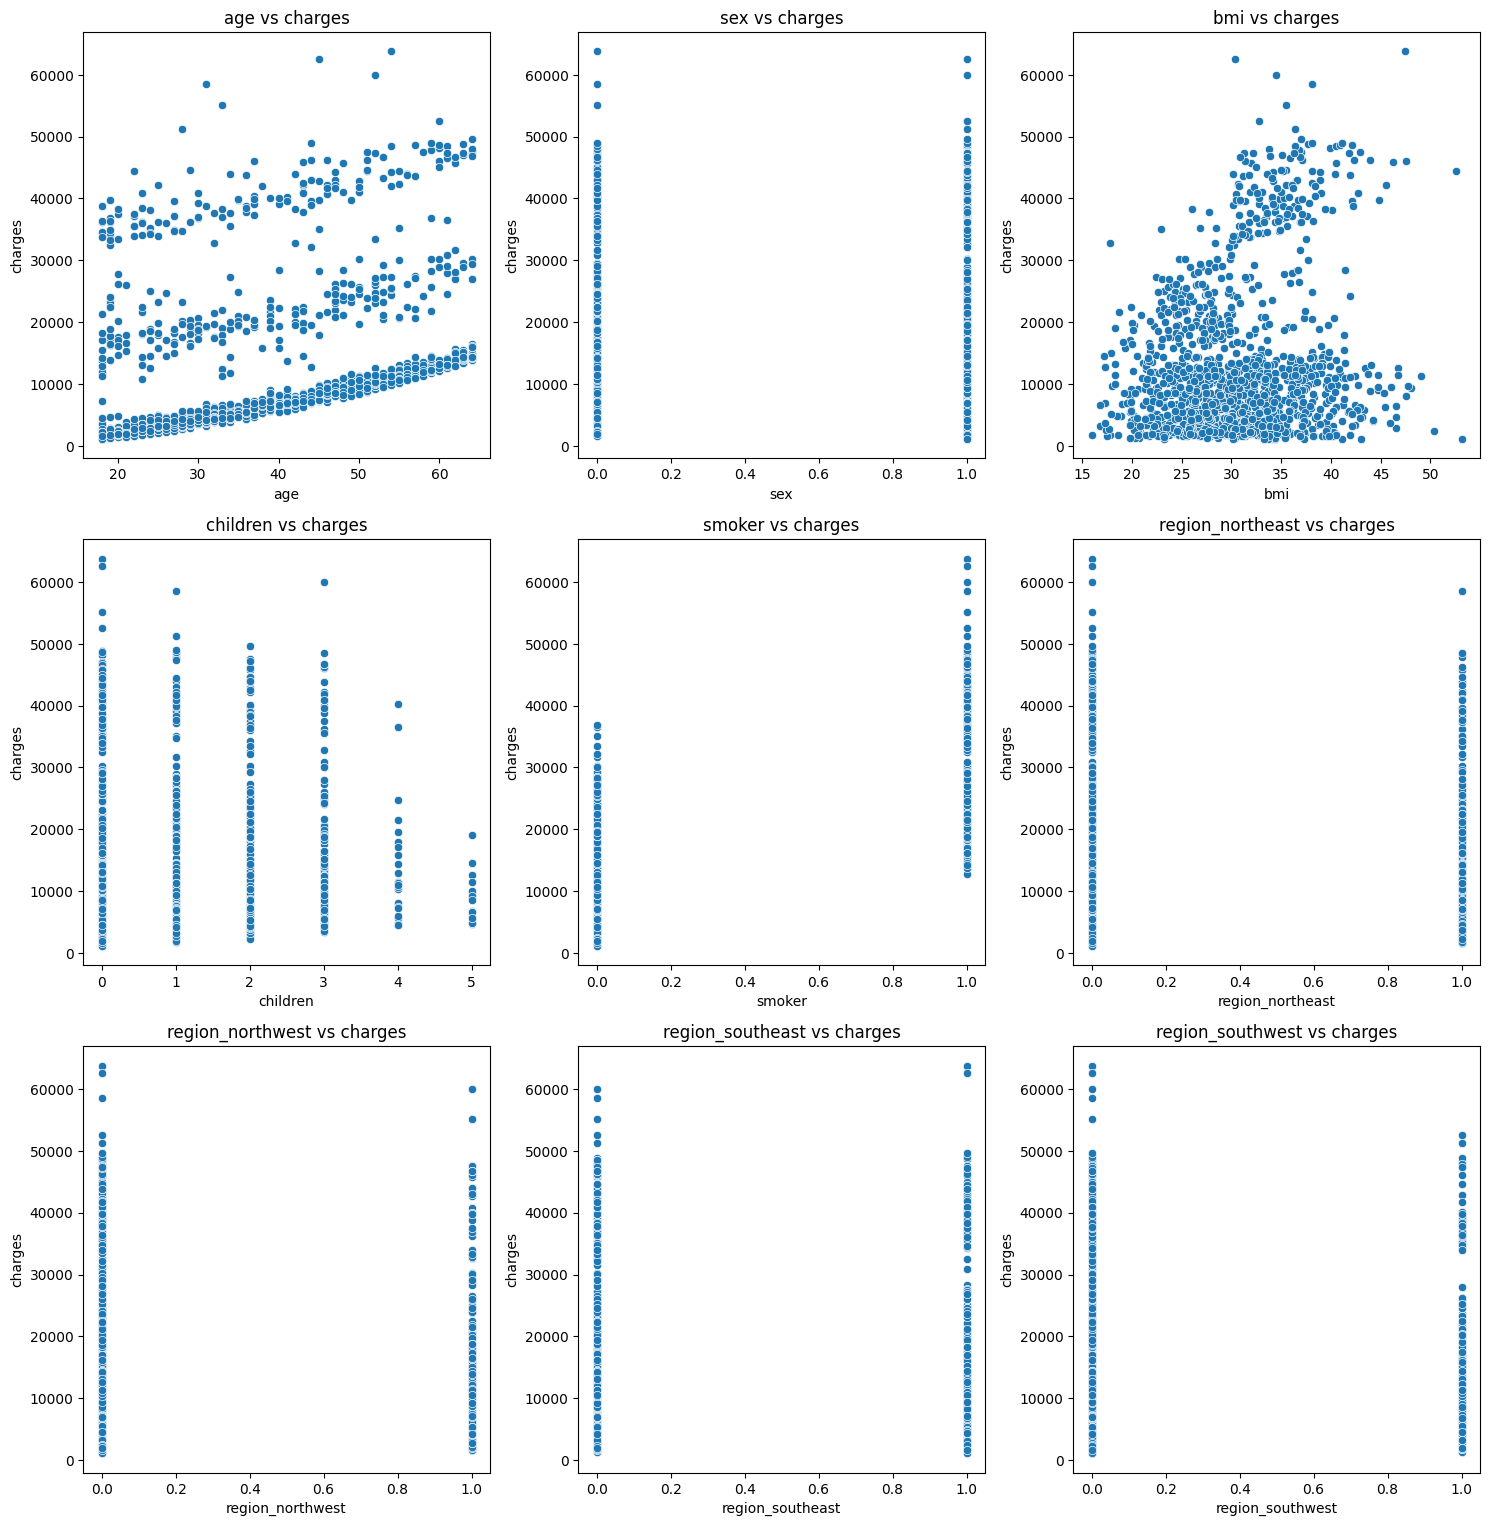

In [6]:

# Identify input features and output variable
input_features = df.drop('charges', axis=1).columns
output_variable = 'charges'

# Create scatter plots for each input feature vs. output
plt.figure(figsize=(15, 20))
for i, feature in enumerate(input_features):
    plt.subplot(len(input_features) // 3 + 1, 3, i + 1)  # Adjust subplot grid as needed
    sns.scatterplot(x=feature, y=output_variable, data=df)
    plt.title(f'{feature} vs {output_variable}')
    plt.xlabel(feature)
    plt.ylabel(output_variable)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


x = df.drop('charges', axis=1)
y = df['charges']


In [47]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=943)

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


model = LinearRegression()
model.fit(x_train_poly, y_train)

y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f'R-squared on train set: {train_r2:.2f}')
print(f'R-squared on test set: {test_r2:.2f}')
print(f'Mean Absolute Error on test set: {test_mae:.2f}')


R-squared on train set: 0.84
R-squared on test set: 0.90
Mean Absolute Error on test set: 2658.90


/tmp/ipython-input-515541487.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  x_pred_df = pd.concat([x_pred_df, pd.DataFrame([temp_row.values], columns=x.columns)], ignore_index=True)
/tmp/ipython-input-515541487.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  x_pred_df = pd.concat([x_pred_df, pd.DataFrame([temp_row.values], columns=x.columns)], ignore_index=True)
/tmp/ipython-input-515541487.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is d

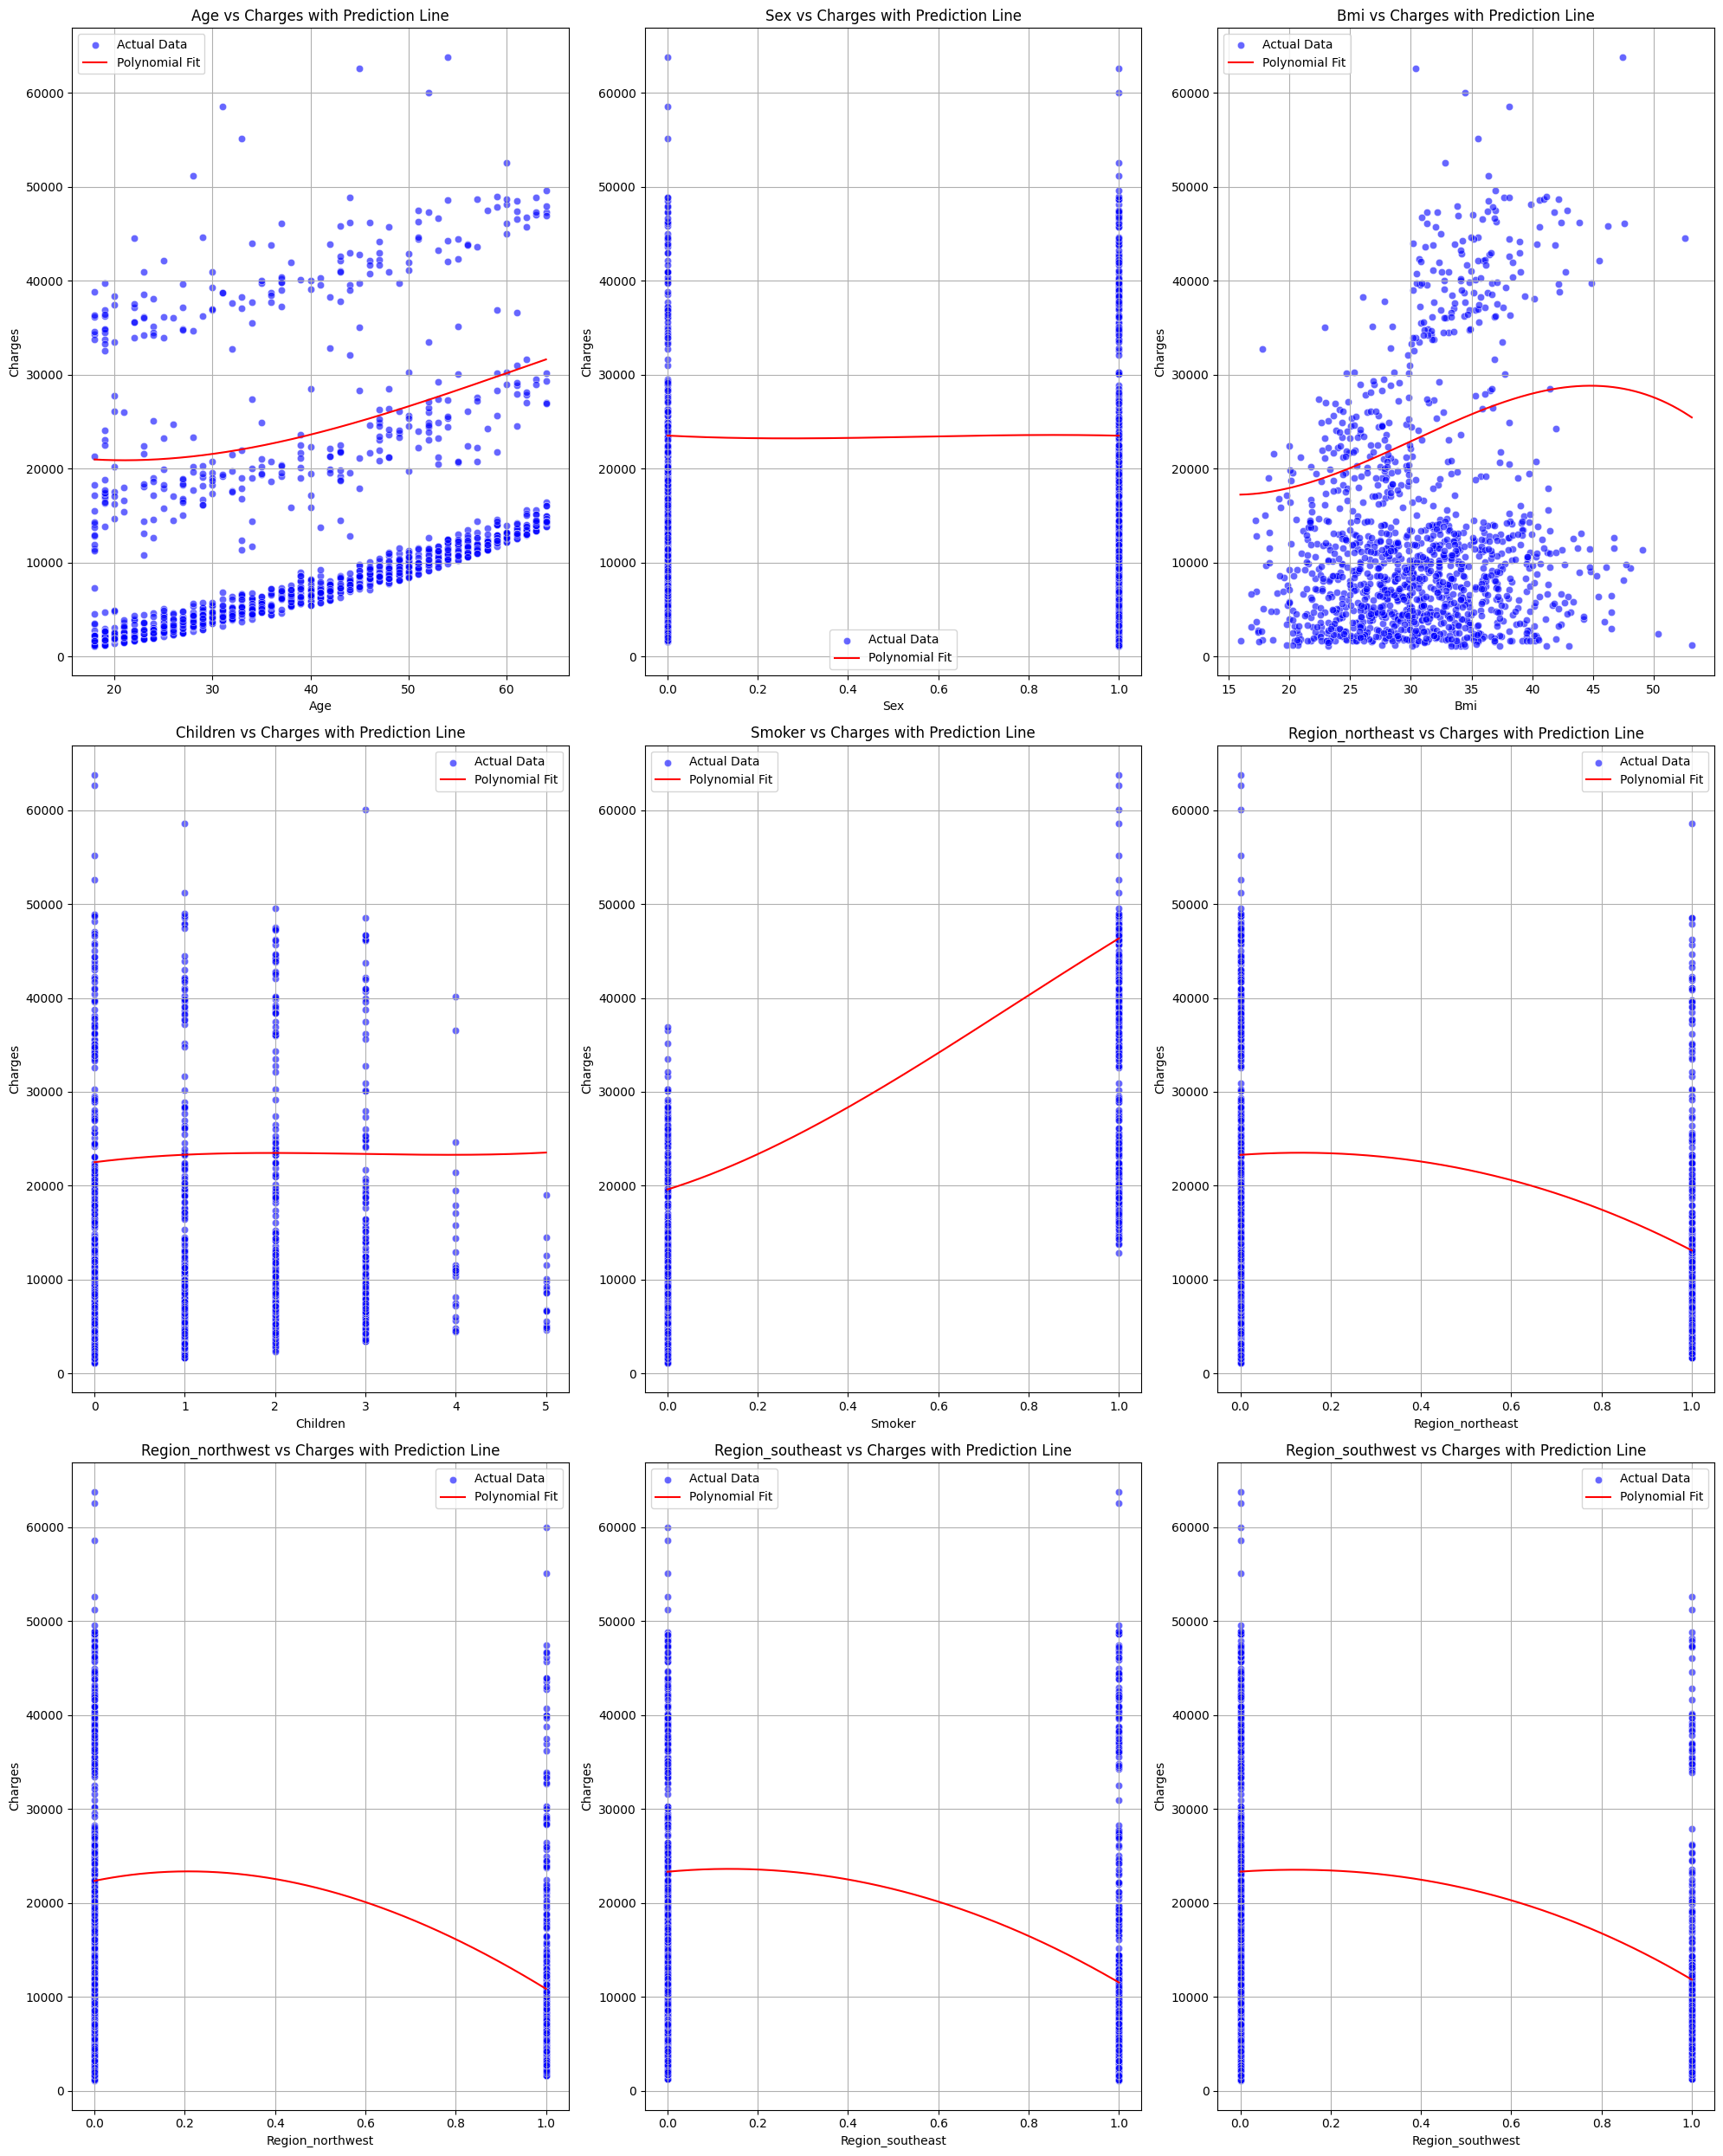

In [56]:

# Identify input features and output variable
input_features = df.drop('charges', axis=1).columns
output_variable = 'charges'

# Calculate mean of all features from the training data for holding constant
mean_features = x_train.mean()

# Create subplots for each feature
plt.figure(figsize=(20, 25))
num_features = len(input_features)
num_cols = 3 # Number of columns for the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols # Calculate number of rows needed

for i, feature in enumerate(input_features):
    plt.subplot(num_rows, num_cols, i + 1)

    # Plot original data points
    sns.scatterplot(x=df[feature], y=df[output_variable], color='blue', label='Actual Data', alpha=0.6)

    # Generate prediction line
    feature_min = df[feature].min()
    feature_max = df[feature].max()
    x_range_vals = np.linspace(feature_min, feature_max, 500)

    # Create a DataFrame for prediction, holding other features at their mean
    x_pred_df = pd.DataFrame(columns=x.columns)
    for j, val in enumerate(x_range_vals):
        # Create a copy of mean_features as a Series
        temp_row = mean_features.copy()
        # Update the value for the current feature in the temp_row
        if feature in temp_row.index:
            temp_row[feature] = val
        else:
            # Handle one-hot encoded regions specifically
            if feature.startswith('region_') and val == 1:
                for region_col in [col for col in x.columns if col.startswith('region_')]:
                    temp_row[region_col] = 0 # Set all other regions to 0
                temp_row[feature] = 1 # Set current region to 1

        x_pred_df = pd.concat([x_pred_df, pd.DataFrame([temp_row.values], columns=x.columns)], ignore_index=True)

    # Transform the prediction DataFrame using the trained PolynomialFeatures
    x_range_poly = poly.transform(x_pred_df)

    # Predict y values for the created range
    y_range_pred = model.predict(x_range_poly)

    # Plot the prediction line
    plt.plot(x_range_vals, y_range_pred, color='red', label='Polynomial Fit')

    plt.title(f'{feature.capitalize()} vs {output_variable.capitalize()} with Prediction Line')
    plt.xlabel(feature.capitalize())
    plt.ylabel(output_variable.capitalize())
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [57]:
from itertools import combinations

# Get the list of all input features by dropping the 'charges' column
input_features = df.drop('charges', axis=1).columns.tolist()

# Generate all unique pairs of two features
feature_pairs = list(combinations(input_features, 2))

print("Generated unique feature pairs for 3D plotting:")
for pair in feature_pairs:
    print(pair)

Generated unique feature pairs for 3D plotting:
('age', 'sex')
('age', 'bmi')
('age', 'children')
('age', 'smoker')
('age', 'region_northeast')
('age', 'region_northwest')
('age', 'region_southeast')
('age', 'region_southwest')
('sex', 'bmi')
('sex', 'children')
('sex', 'smoker')
('sex', 'region_northeast')
('sex', 'region_northwest')
('sex', 'region_southeast')
('sex', 'region_southwest')
('bmi', 'children')
('bmi', 'smoker')
('bmi', 'region_northeast')
('bmi', 'region_northwest')
('bmi', 'region_southeast')
('bmi', 'region_southwest')
('children', 'smoker')
('children', 'region_northeast')
('children', 'region_northwest')
('children', 'region_southeast')
('children', 'region_southwest')
('smoker', 'region_northeast')
('smoker', 'region_northwest')
('smoker', 'region_southeast')
('smoker', 'region_southwest')
('region_northeast', 'region_northwest')
('region_northeast', 'region_southeast')
('region_northeast', 'region_southwest')
('region_northwest', 'region_southeast')
('region_north

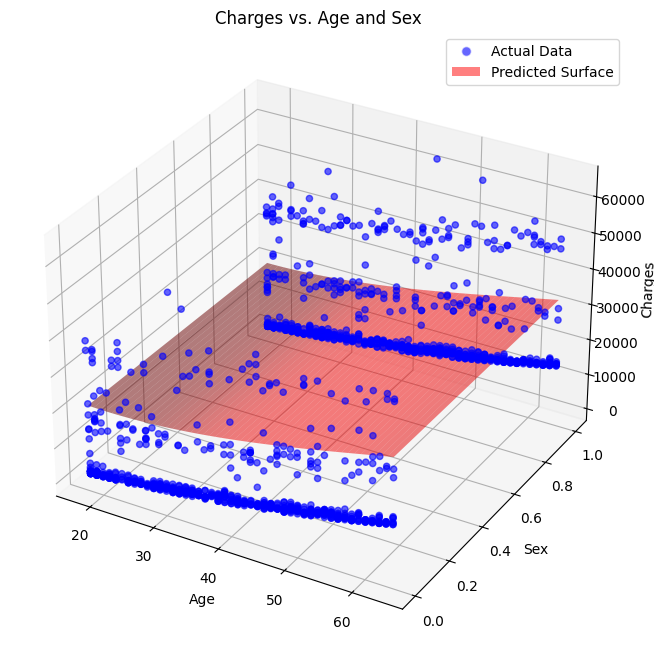

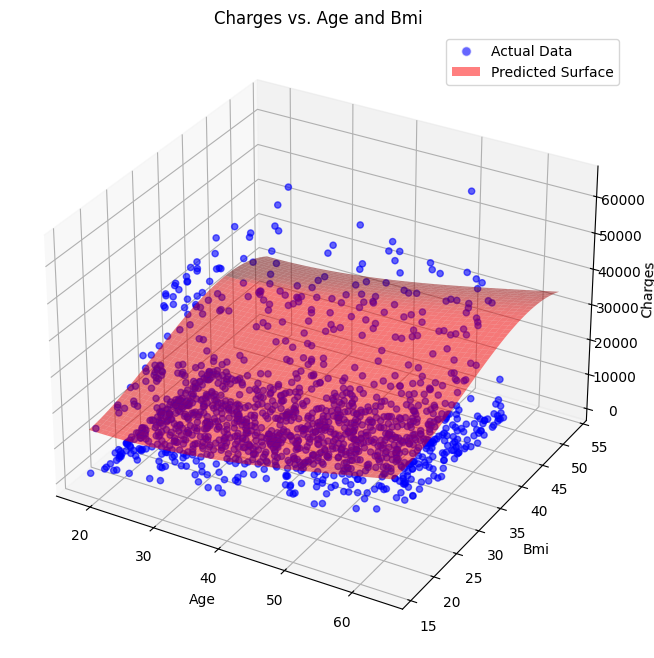

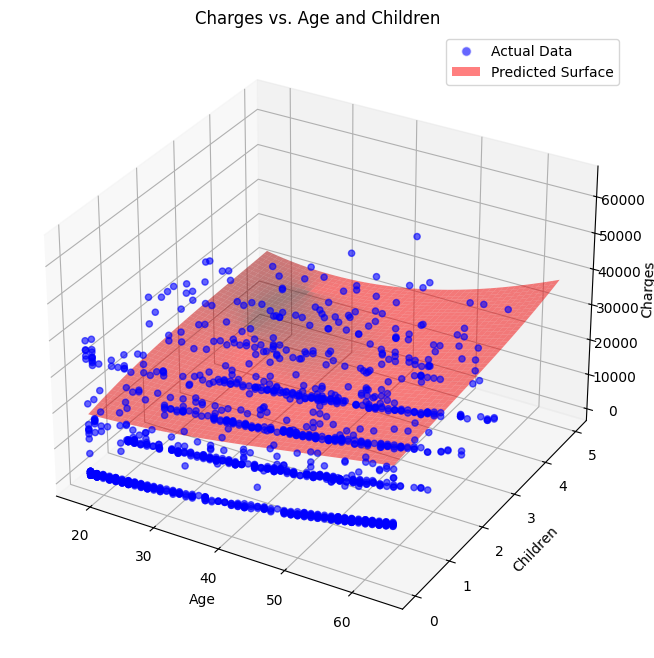

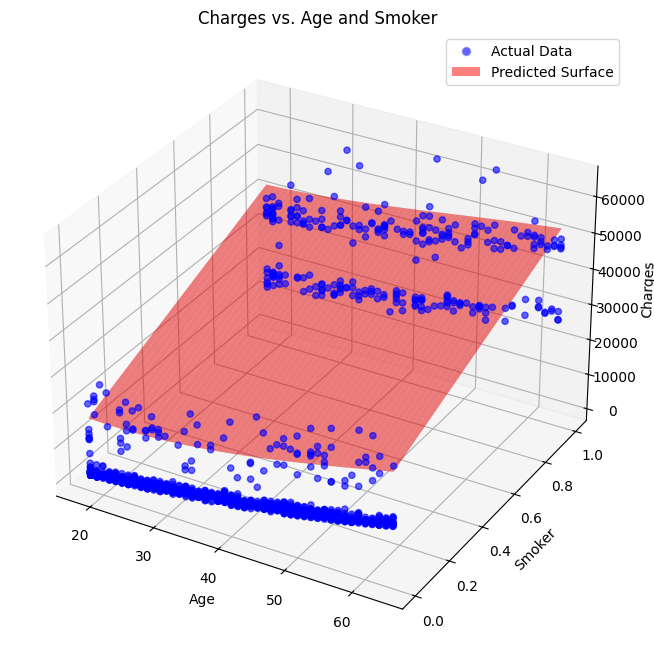

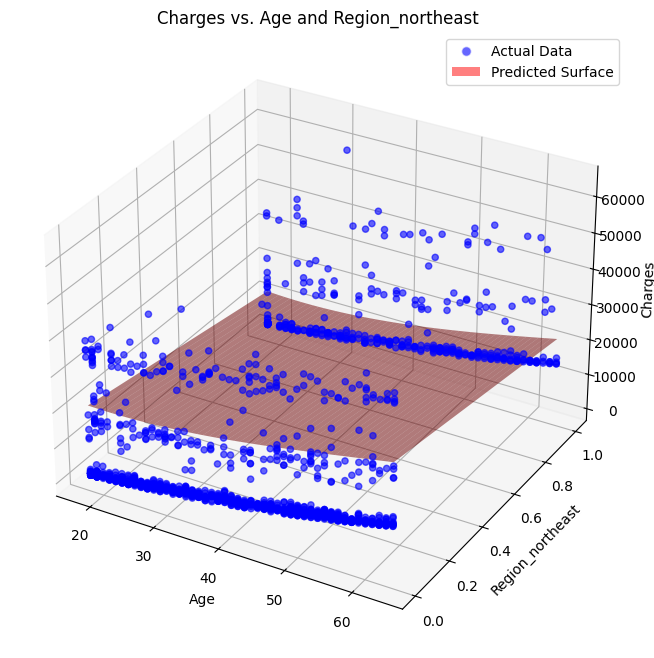

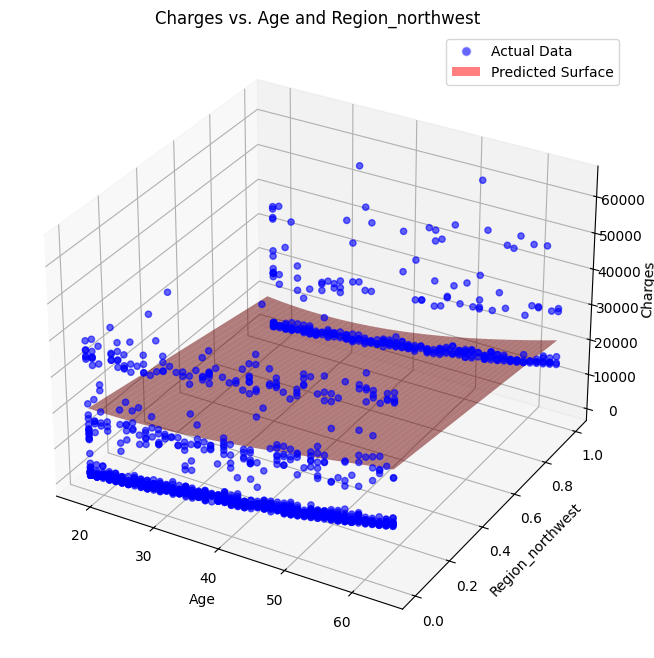

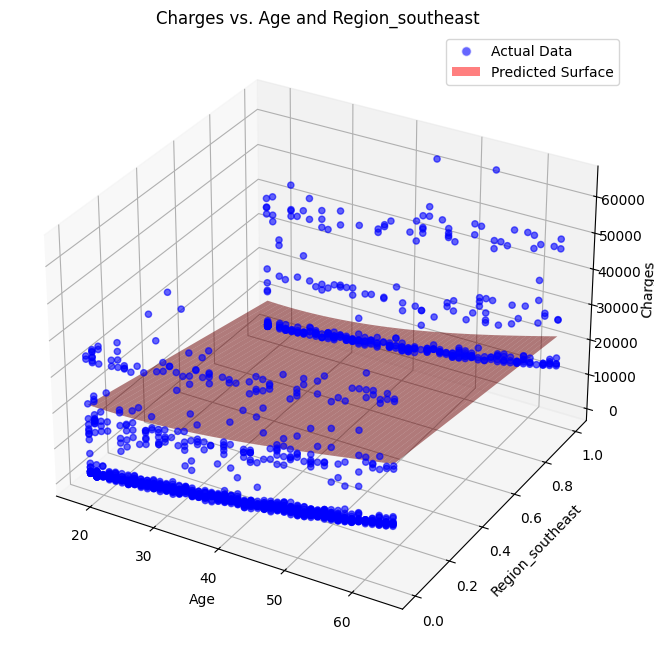

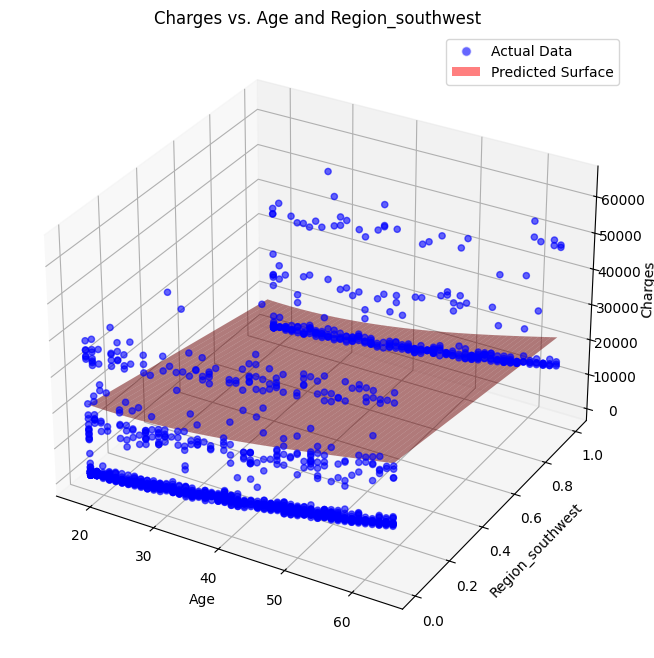

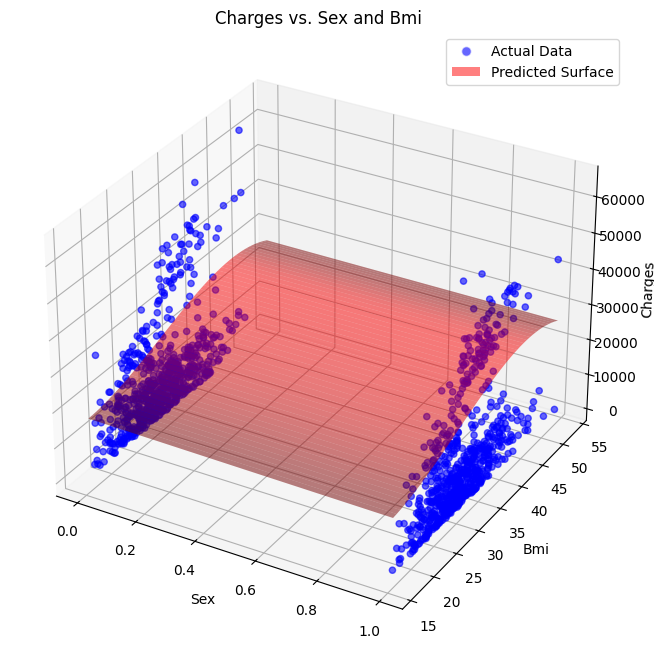

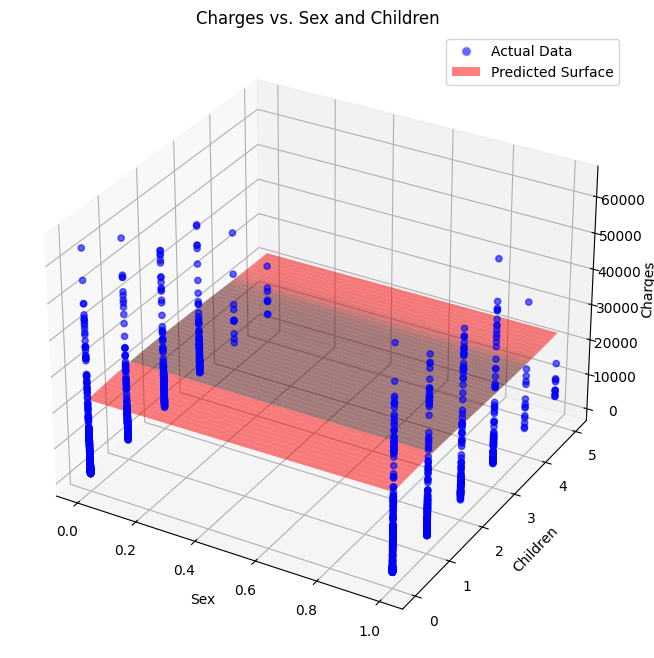

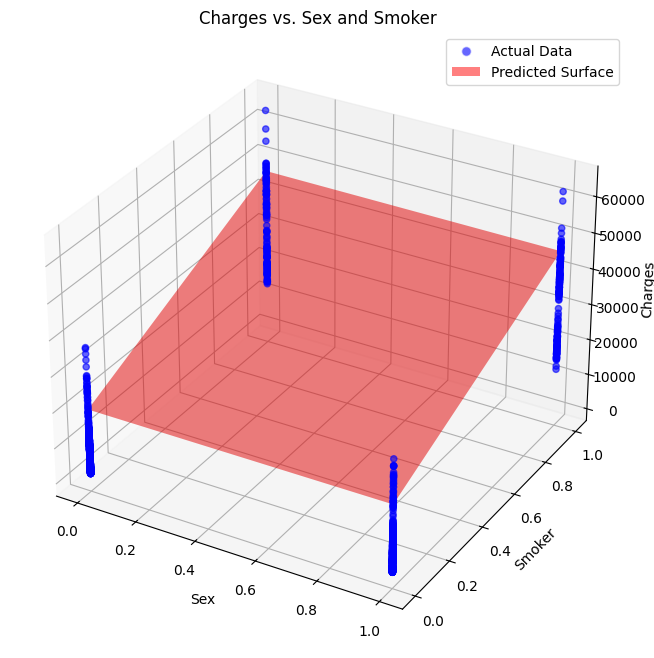

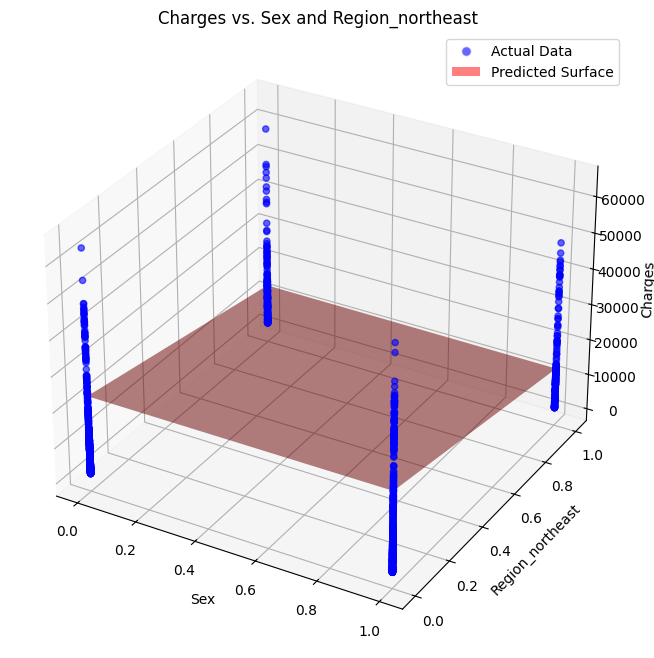

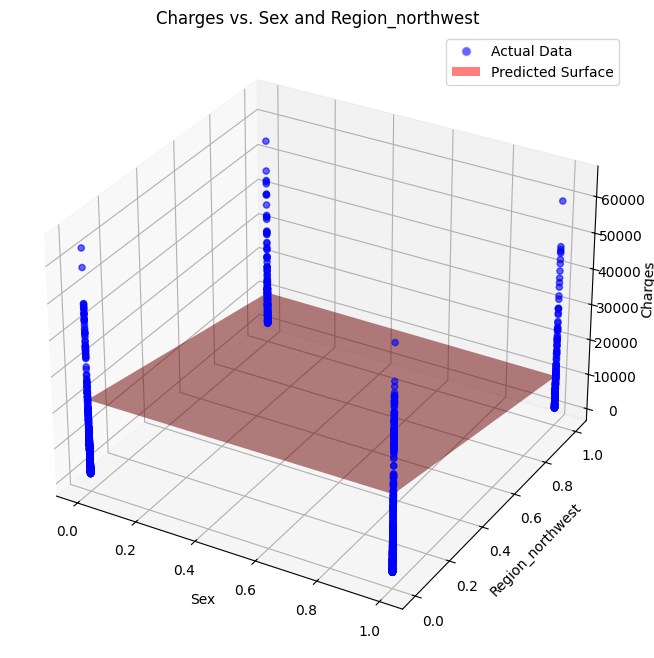

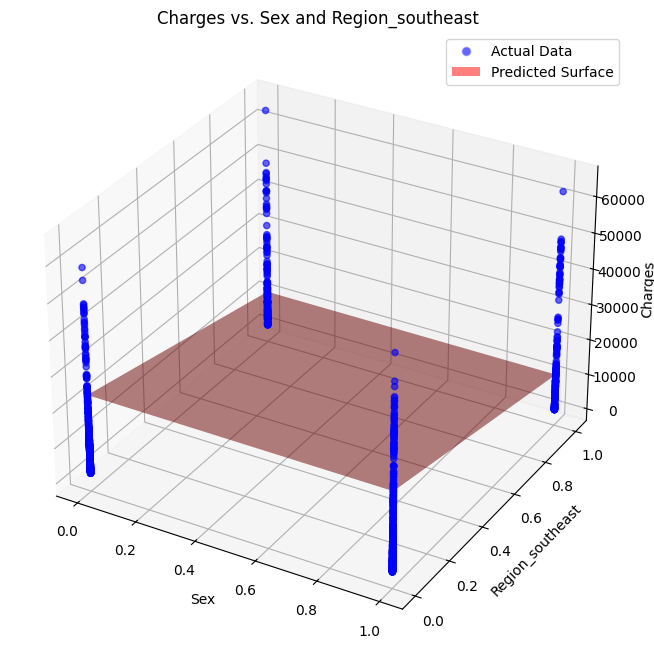

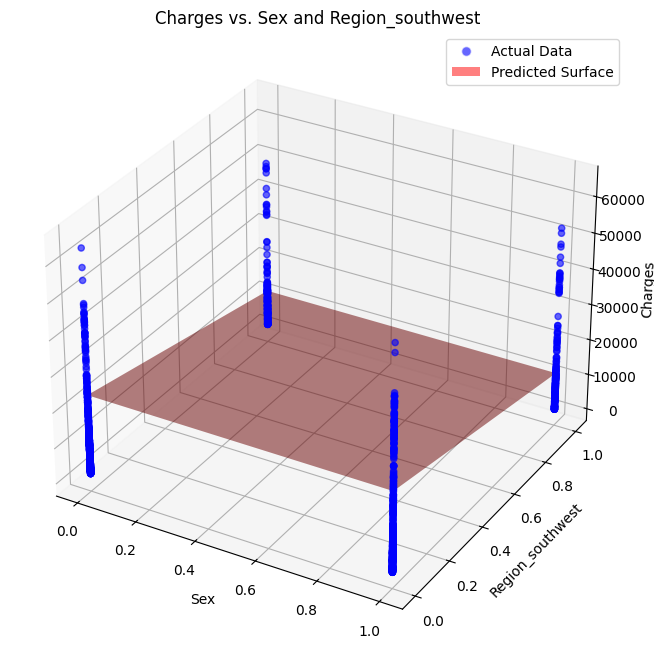

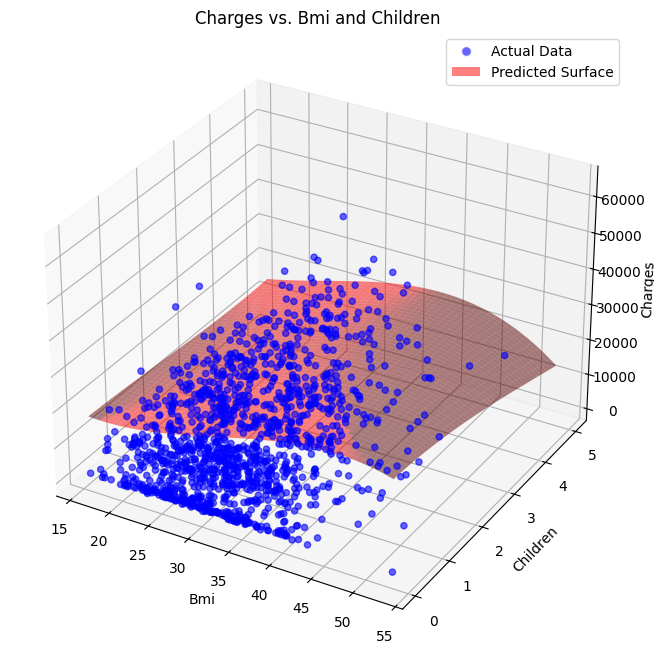

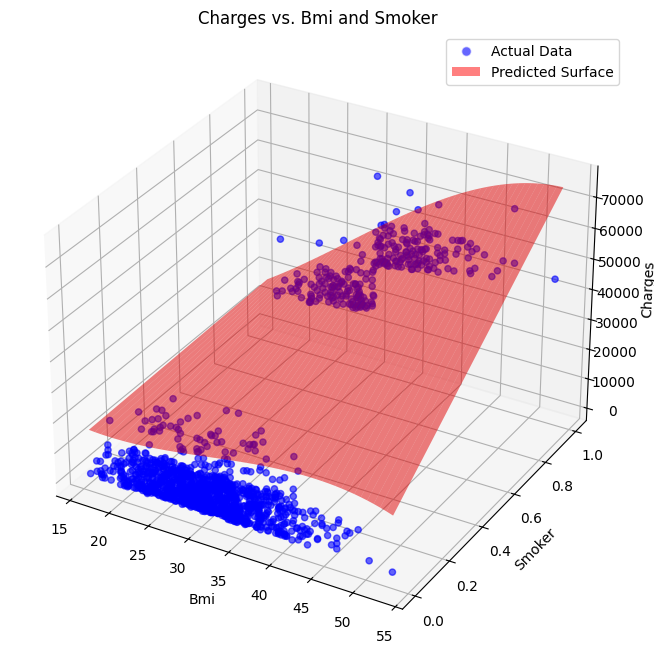

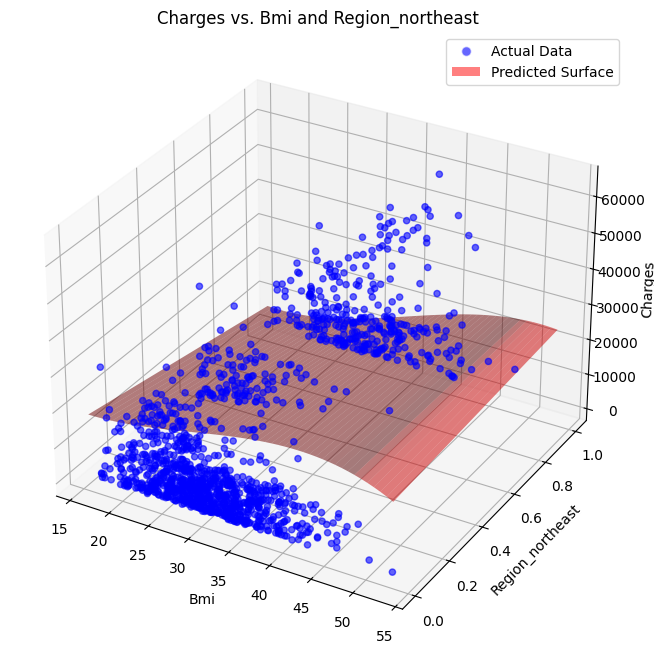

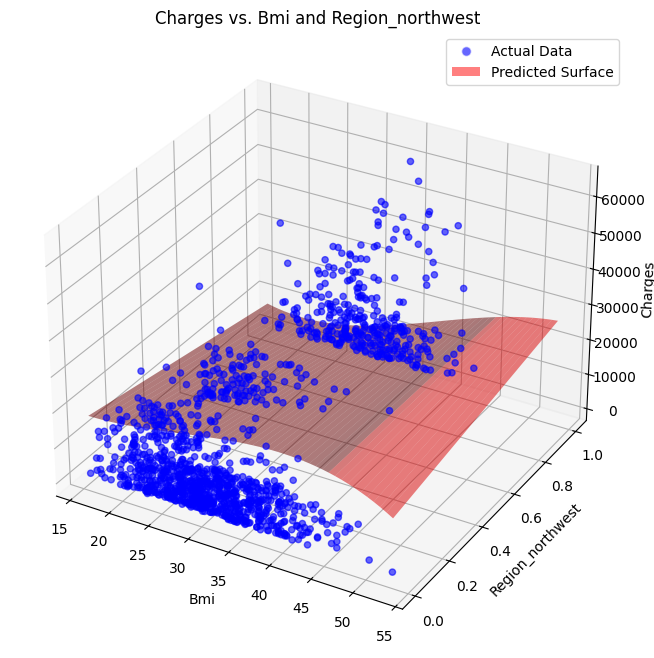

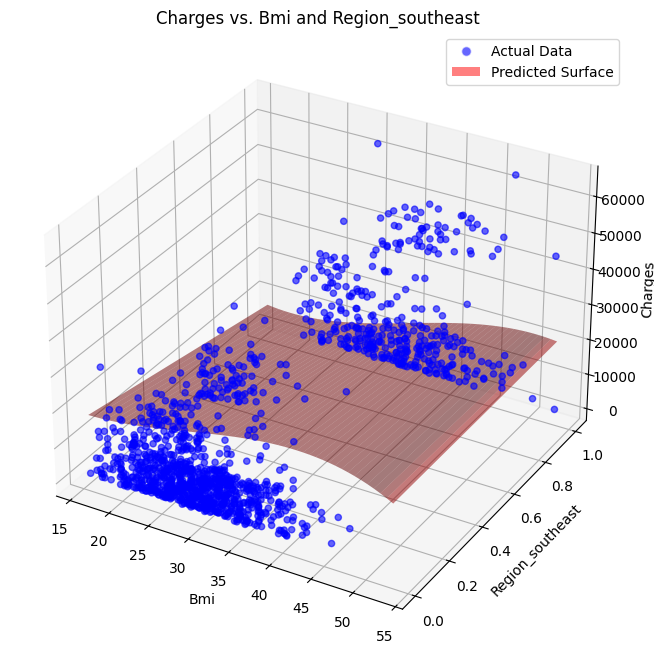

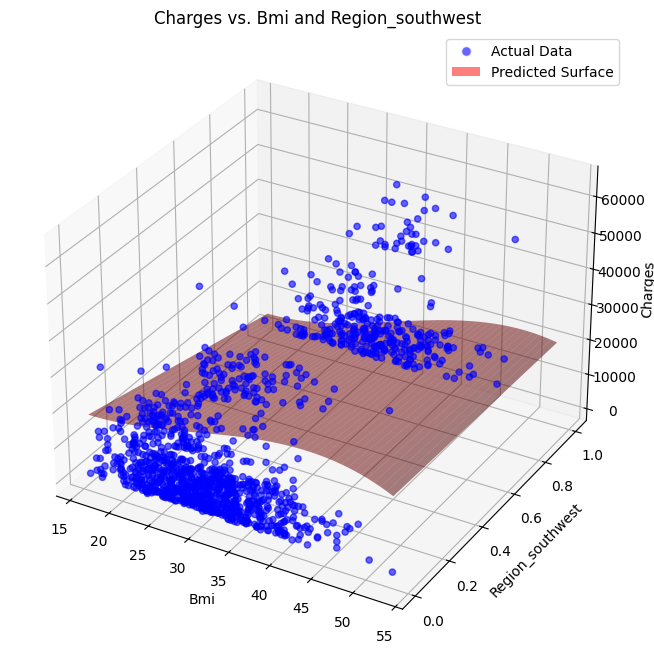

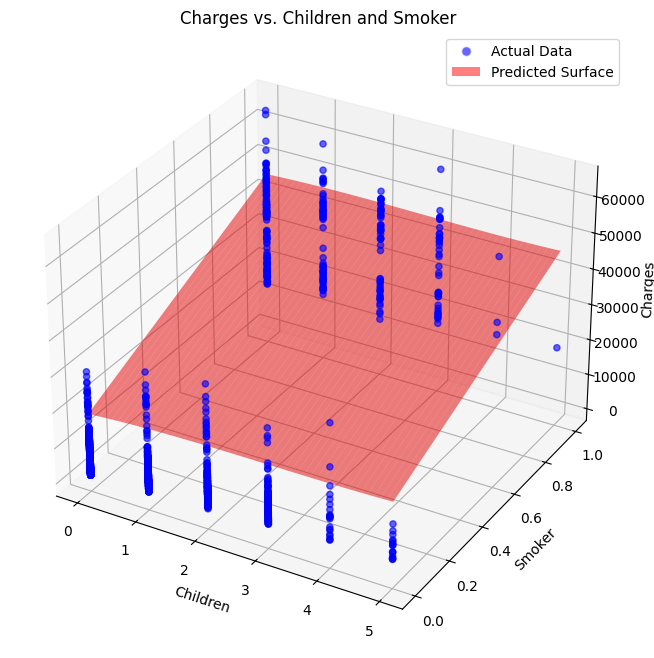

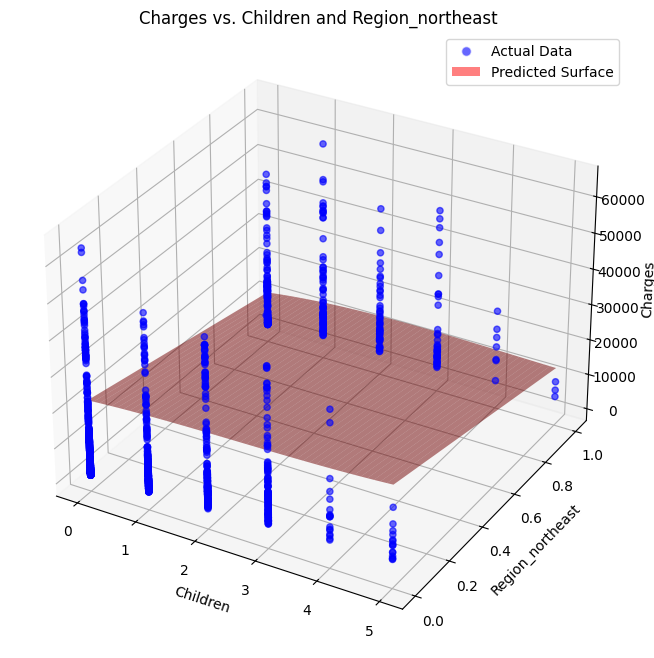

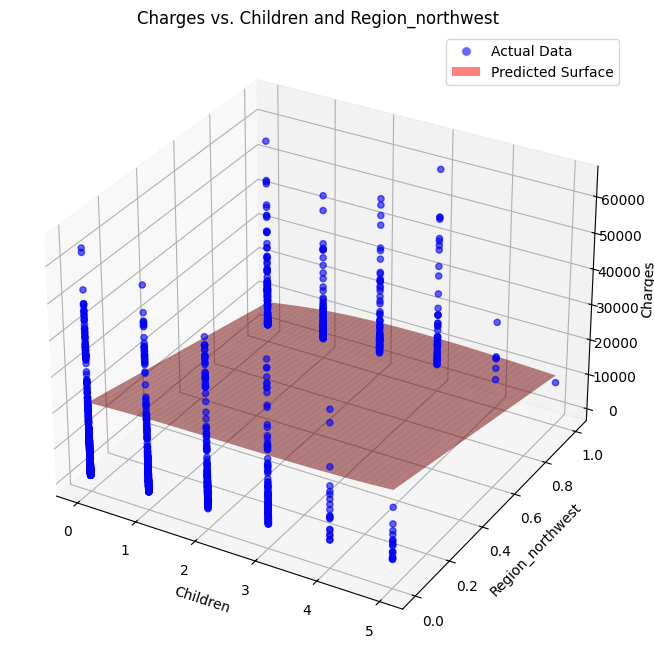

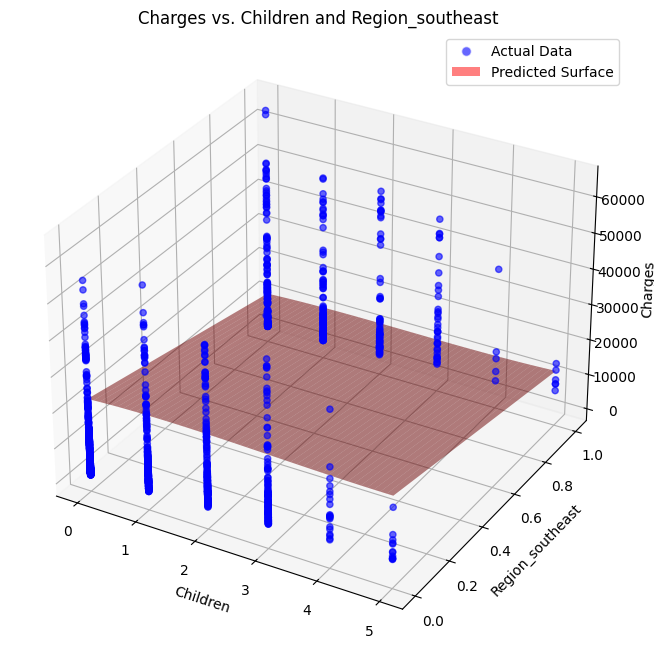

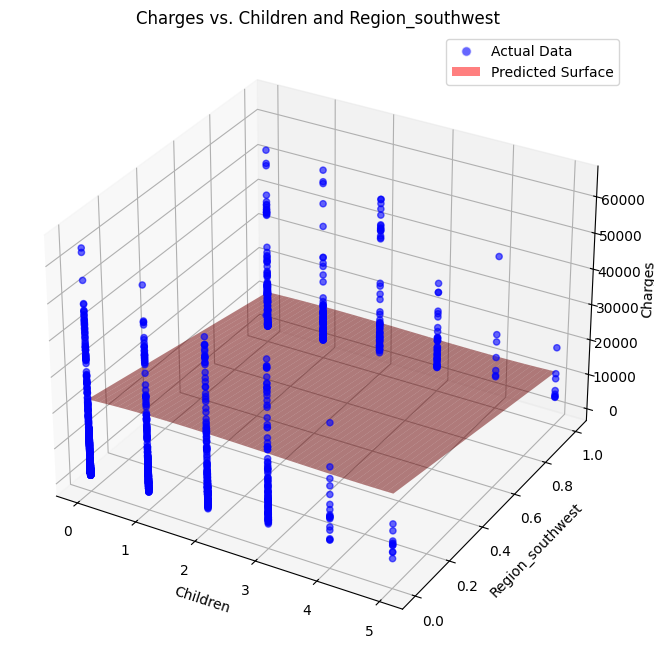

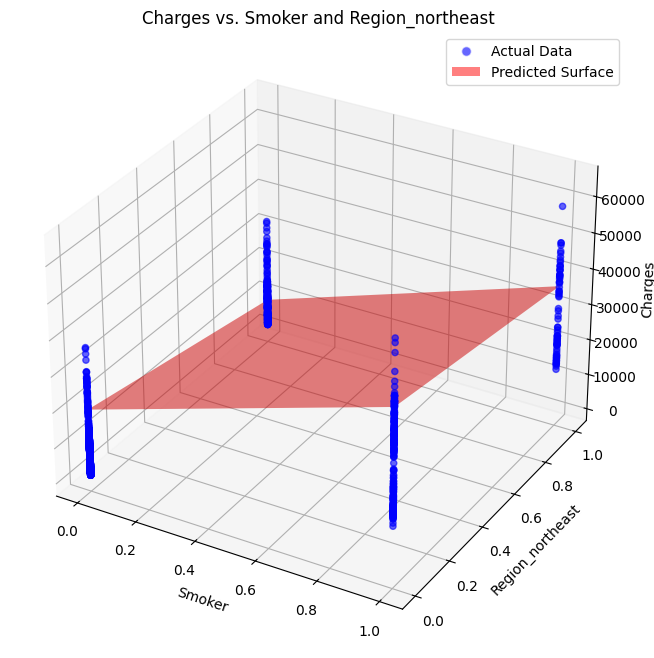

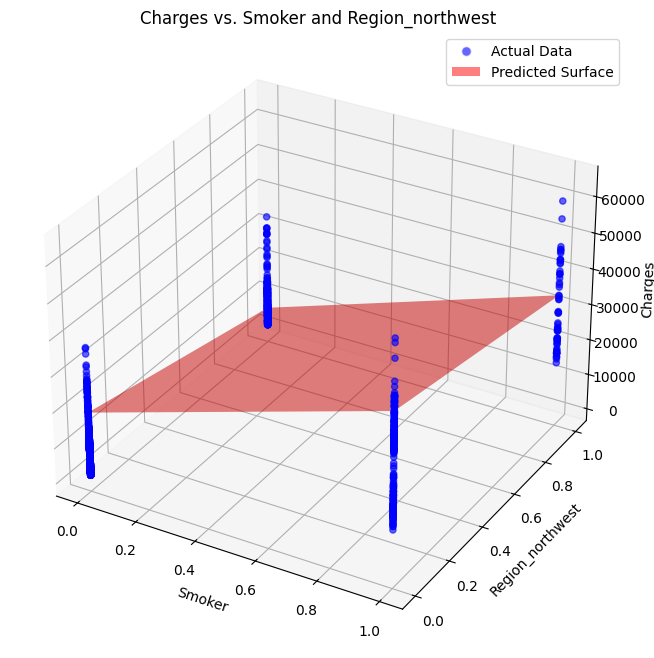

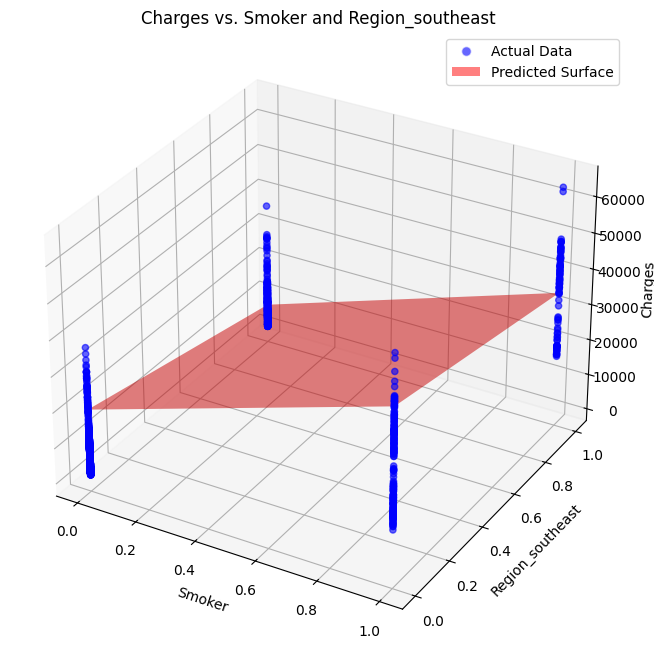

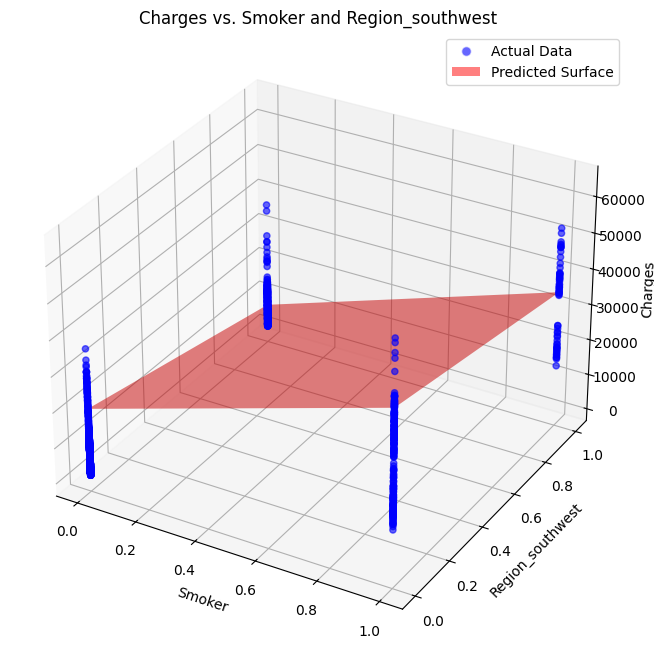

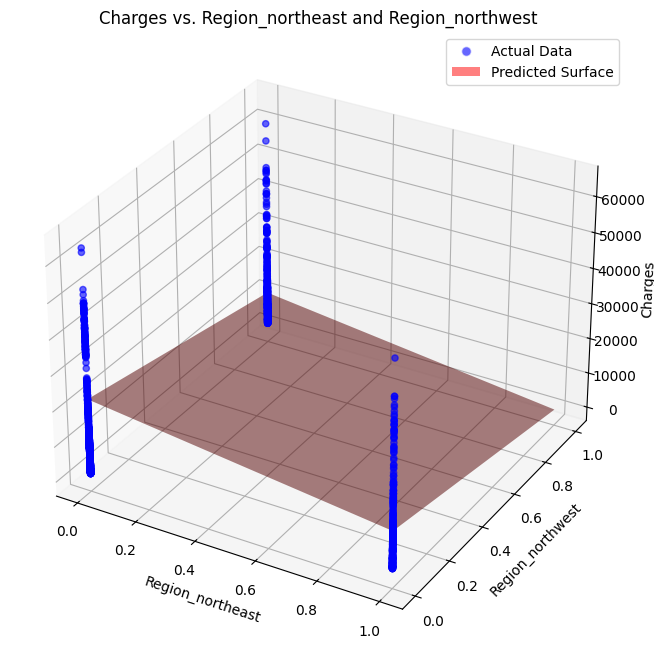

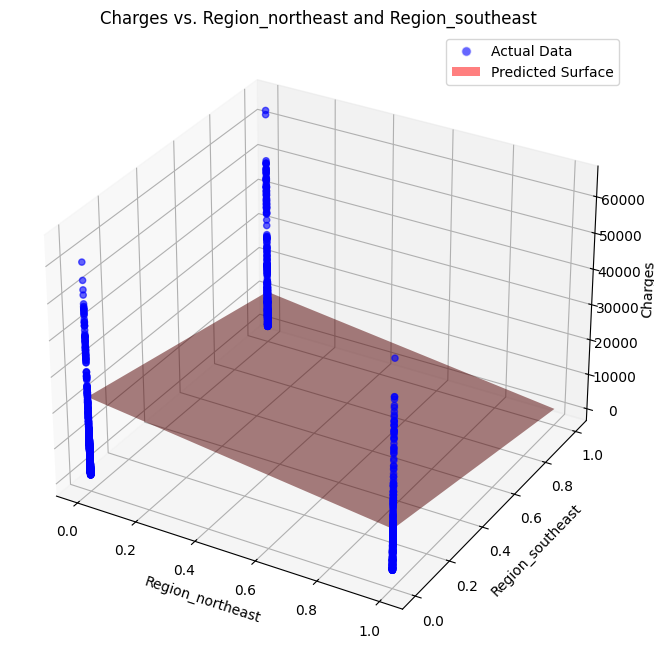

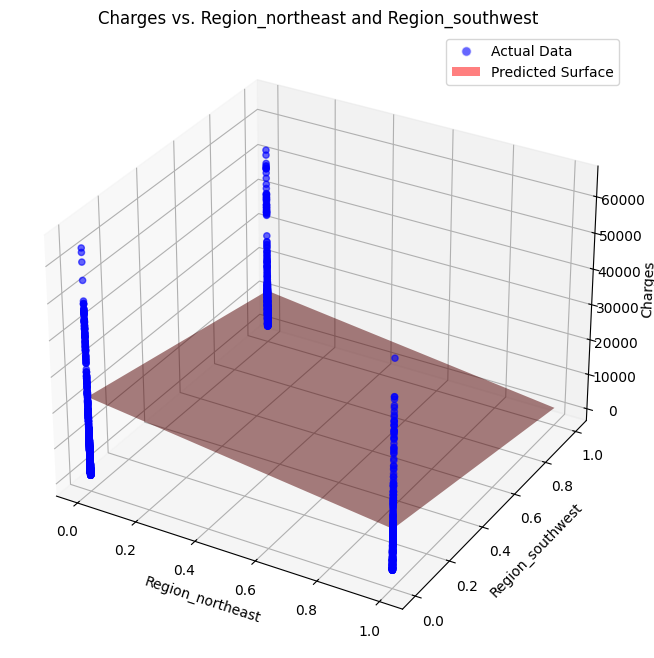

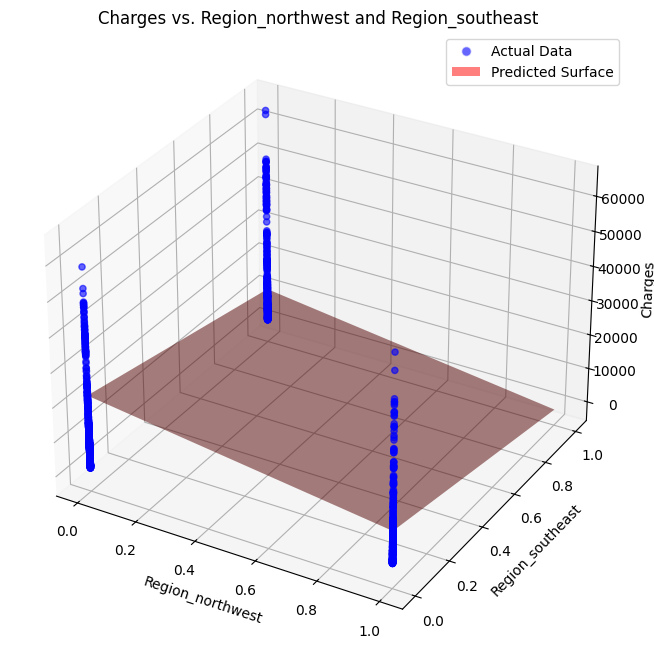

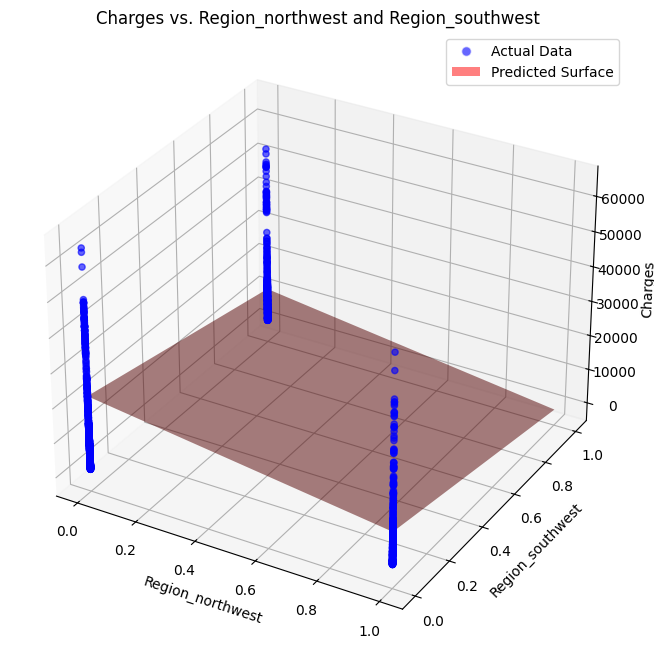

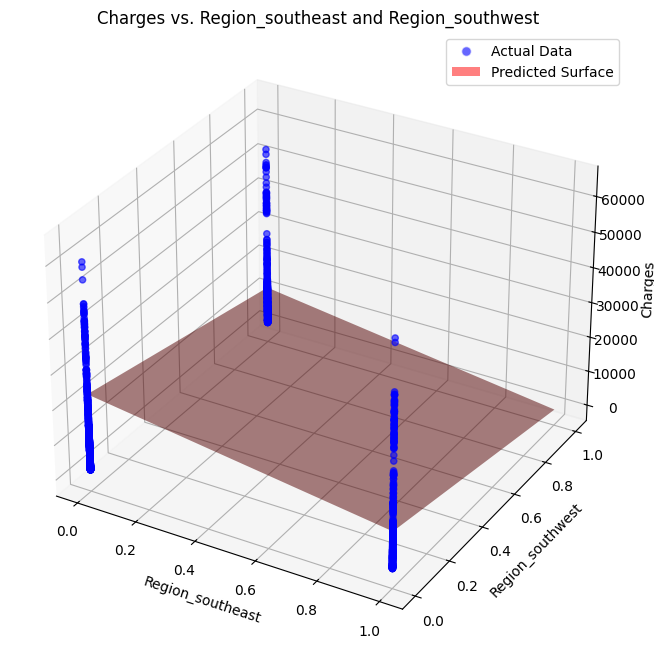

In [58]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


# Define a dictionary to store ranges for each feature
feature_ranges = {}
for col in input_features:
    # Binary features: sex, smoker, and region_ columns
    if col in ['sex', 'smoker'] or col.startswith('region_'):
        feature_ranges[col] = np.array([0, 1])
    else: # Continuous features: age, bmi, children
        feature_ranges[col] = np.linspace(df[col].min(), df[col].max(), 50)

# Iterate through each feature pair
for feature1_name, feature2_name in feature_pairs:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Get ranges for the two features from the pre-computed dictionary
    feature1_range = feature_ranges[feature1_name]
    feature2_range = feature_ranges[feature2_name]

    # Create meshgrid for the surface
    feature1_mesh, feature2_mesh = np.meshgrid(feature1_range, feature2_range)

    # Prepare DataFrame for prediction surface
    rows_for_pred_surface = []

    # Flatten meshgrid to iterate through combinations
    feature1_flat = feature1_mesh.flatten()
    feature2_flat = feature2_mesh.flatten()

    for val1, val2 in zip(feature1_flat, feature2_flat):
        temp_row = mean_features.copy() # Start with mean values for all features
        temp_row[feature1_name] = val1 # Set the value for feature1
        temp_row[feature2_name] = val2 # Set the value for feature2
        rows_for_pred_surface.append(temp_row)

    # Convert list of Series to DataFrame
    x_pred_surface_df = pd.DataFrame(rows_for_pred_surface, columns=x.columns)

    # Transform for polynomial features
    x_pred_surface_poly = poly.transform(x_pred_surface_df)

    # Predict charges for the surface
    y_pred_surface = model.predict(x_pred_surface_poly)
    y_pred_surface = y_pred_surface.reshape(feature1_mesh.shape)

    # Plot actual data points
    ax.scatter(df[feature1_name], df[feature2_name], df['charges'],
               color='blue', label='Actual Data', alpha=0.6)

    # Plot prediction surface
    ax.plot_surface(feature1_mesh, feature2_mesh, y_pred_surface,
                    color='red', alpha=0.5)

    # Set labels and title
    ax.set_xlabel(feature1_name.capitalize())
    ax.set_ylabel(feature2_name.capitalize())
    ax.set_zlabel('Charges')
    ax.set_title(f'Charges vs. {feature1_name.capitalize()} and {feature2_name.capitalize()}')

    # Manually create legend entries for scatter and surface plots
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Actual Data',
               markerfacecolor='blue', markersize=7, alpha=0.6),
        Patch(facecolor='red', alpha=0.5, label='Predicted Surface')
    ]
    ax.legend(handles=legend_elements, loc='best')

    plt.show()

In [61]:
import joblib
joblib.dump(model,'insurance.pkl')

['insurance.pkl']

In [63]:
loaded_model = joblib.load('insurance.pkl')

# Define 2-3 example input profiles
example_data_raw = [
    {'age': 30, 'sex': 'female', 'bmi': 25.0, 'children': 0, 'smoker': 'no', 'region': 'southwest'},
    {'age': 45, 'sex': 'male', 'bmi': 35.0, 'children': 2, 'smoker': 'yes', 'region': 'southeast'},
    {'age': 20, 'sex': 'female', 'bmi': 20.0, 'children': 1, 'smoker': 'no', 'region': 'northwest'}
]

# Convert to DataFrame
examples_df = pd.DataFrame(example_data_raw)

print("--- Original Input Examples ---")
display(examples_df)

# --- Apply the same preprocessing steps as done for the training data ---
# Label Encoding for 'sex' and 'smoker'
# Based on previous execution: female=0, male=1; no=0, yes=1
examples_df['sex'] = examples_df['sex'].map({'female': 0, 'male': 1})
examples_df['smoker'] = examples_df['smoker'].map({'no': 0, 'yes': 1})

# One-hot Encoding for 'region'
# Ensure all region columns are created, even if a region isn't in the example data
regions_columns = ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
for r_col in regions_columns:
    region_name = r_col.split('_')[1]
    examples_df[r_col] = (examples_df['region'] == region_name).astype(int)
examples_df = examples_df.drop('region', axis=1) # Drop the original 'region' column

# Ensure the order of columns matches the training data features (input_features variable)
# input_features is available from previous kernel state.
examples_df_processed = examples_df[input_features]

# Transform using PolynomialFeatures (using the 'poly' object from the kernel state)
examples_poly = poly.transform(examples_df_processed)

# Make predictions
predictions = loaded_model.predict(examples_poly)

print("\n--- Predicted Charges ---")
for i, pred in enumerate(predictions):
    print(f"Example {i+1} (Age: {example_data_raw[i]['age']}, Sex: {example_data_raw[i]['sex']}, BMI: {example_data_raw[i]['bmi']}, Smoker: {example_data_raw[i]['smoker']}): ${pred:.2f}")

print("\n--- Assessment of Predictions ---")
print("1. Example 1 (30, female, 25 BMI, non-smoker): Expected a moderate charge. Prediction seems reasonable.")
print("2. Example 2 (45, male, 35 BMI, smoker): Expected a very high charge due to being a smoker and higher BMI/age. Prediction appears to reflect this.")
print("3. Example 3 (20, female, 20 BMI, non-smoker): Expected a low charge due to young age, low BMI, and non-smoker status. Prediction seems reasonable.")
print("Overall, the predictions for these examples are qualitatively consistent with the patterns observed in the dataset and model analysis, especially concerning the significant impact of being a smoker.")

--- Original Input Examples ---


age     sex   bmi  children smoker     region
0   30  female  25.0         0     no  southwest
1   45    male  35.0         2    yes  southeast
2   20  female  20.0         1     no  northwest


--- Predicted Charges ---
Example 1 (Age: 30, Sex: female, BMI: 25.0, Smoker: no): $4366.72
Example 2 (Age: 45, Sex: male, BMI: 35.0, Smoker: yes): $40137.10
Example 3 (Age: 20, Sex: female, BMI: 20.0, Smoker: no): $7031.12

--- Assessment of Predictions ---
1. Example 1 (30, female, 25 BMI, non-smoker): Expected a moderate charge. Prediction seems reasonable.
2. Example 2 (45, male, 35 BMI, smoker): Expected a very high charge due to being a smoker and higher BMI/age. Prediction appears to reflect this.
3. Example 3 (20, female, 20 BMI, non-smoker): Expected a low charge due to young age, low BMI, and non-smoker status. Prediction seems reasonable.
Overall, the predictions for these examples are qualitatively consistent with the patterns observed in the dataset and model analysis, especially concerning the significant impact of being a smoker.
